# Neural Network

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
# Step 1: Load and preprocess the dataset
# Load the MNIST dataset, which consists of 60,000 training samples and 10,000 test samples of handwritten digits
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train/255
X_test = X_test/255


In [54]:
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = Sequential([
    Input((28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') 
])

model.compile(optimizer = "adam",
              loss=SparseCategoricalCrossentropy(), 
              metrics=['accuracy']) 

history = model.fit(X_train, Y_train, epochs=30,batch_size=1000, validation_data=(X_test, Y_test))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy}")

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6251 - loss: 1.2952 - val_accuracy: 0.9042 - val_loss: 0.3565
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9069 - loss: 0.3362 - val_accuracy: 0.9232 - val_loss: 0.2759
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9258 - loss: 0.2681 - val_accuracy: 0.9334 - val_loss: 0.2336
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9370 - loss: 0.2274 - val_accuracy: 0.9413 - val_loss: 0.2049
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9464 - loss: 0.1933 - val_accuracy: 0.9472 - val_loss: 0.1826
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9519 - loss: 0.1735 - val_accuracy: 0.9539 - val_loss: 0.1640
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9589 - loss: 0.1481 - val_accuracy: 0.9578 - val_loss: 0.1499
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9600 - loss: 0.1402 - val_accuracy: 0.9611 - va

In [55]:
data = X_train
prediction = model.predict(data)
prediction

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[2.7896258e-10, 1.9616064e-09, 1.0460319e-06, ..., 8.7697281e-08,
        1.8482218e-09, 1.6549706e-08],
       [9.9997675e-01, 1.1640423e-12, 2.3159389e-05, ..., 2.9548048e-08,
        1.0987322e-09, 1.3583418e-07],
       [3.9048741e-06, 2.8858992e-04, 1.0875674e-03, ..., 9.5350645e-04,
        1.9060646e-04, 8.0288650e-04],
       ...,
       [3.3340736e-10, 2.3863276e-08, 4.4201393e-11, ..., 3.5363639e-11,
        2.0260113e-06, 6.7113518e-07],
       [6.7395813e-05, 3.1986733e-06, 1.8313168e-04, ..., 7.8855001e-06,
        8.6160735e-06, 3.7787748e-07],
       [1.9584622e-03, 2.3442394e-07, 2.5571591e-05, ..., 3.0721956e-05,
        9.9742317e-01, 5.3996465e-04]], dtype=float32)

In [56]:
import numpy as np
predicted_classes = np.argmax(prediction, axis=1)


Predicted Value:  9 Original value:  9


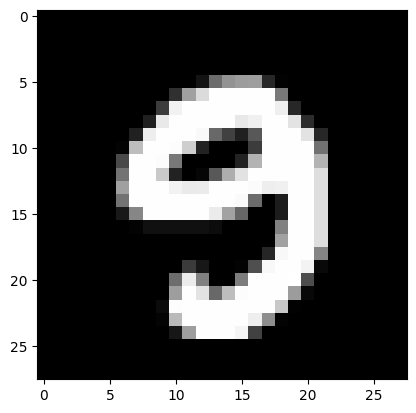

In [57]:
i = np.random.randint(0,60000)
print("Predicted Value: ",predicted_classes[i],"Original value: ",Y_train[i])
plt.gray()
plt.imshow(data[i])
plt.show()

# print(data[i])

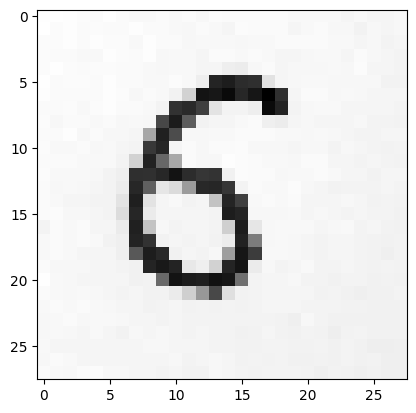

In [28]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("6.jpg")
img_new = cv2.resize(img,(28,28))
gray = cv2.cvtColor(img_new, cv2.COLOR_BGR2GRAY)

new_img = gray/255

# print(new_img)
plt.imshow(new_img)
plt.show()

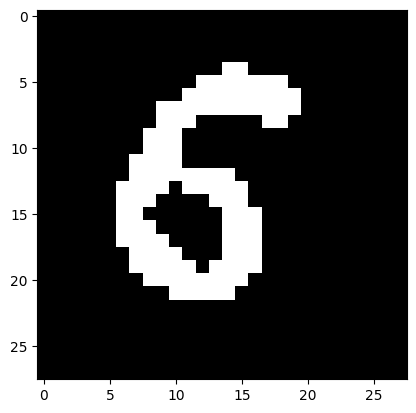

In [29]:
import cv2

# Read the image
image = cv2.imread('6.jpg', cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image,(28,28))

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply adaptive Gaussian thresholding for gradient-like effect
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)




plt.imshow(thresh)
plt.show()
# print(thresh)


In [30]:
new_img = np.array(thresh)/255
# print(new_img)
pre_num = model.predict(np.array([new_img]))
print(pre_num)
ans = np.argmax(pre_num)
print("Predicted Number: ",ans)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 28, 28), dtype=float32). Expected shape (None, 1024), but input has incompatible shape (1, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 28, 28), dtype=float32)
  • training=False
  • mask=None

# Predicting Hindi letters

When designing a neural network for identifying handwritten alphabets, especially if you aim to achieve high accuracy, a Convolutional Neural Network (CNN) is generally more effective than a simple feedforward neural network (like the one you provided). CNNs are particularly well-suited for image data because they can capture spatial hierarchies and patterns.

Here's an example of how you can design a CNN using TensorFlow and Keras:

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    # First convolutional layer with 32 filters, kernel size 3x3, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, kernel size 3x3, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters, kernel size 3x3, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    
    # Flatten the output of the convolutional layers
    Flatten(),
    
    # Fully connected (dense) layer with 128 units, ReLU activation
    Dense(128, activation='relu'),
    # Dropout layer to prevent overfitting
    Dropout(0.5),
    
    # Output layer with 26 units (one for each alphabet letter), softmax activation
    Dense(26, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()
```

### Key Components:
1. **Conv2D Layers**: These layers apply convolution operations to capture local patterns in the image. Each Conv2D layer has a number of filters and a kernel size that determines the receptive field.
2. **MaxPooling2D Layers**: These layers reduce the spatial dimensions (height and width) of the feature maps, helping to downsample the image representation and reduce computation.
3. **Flatten Layer**: This layer converts the 2D output of the convolutional layers into a 1D array, which can be fed into fully connected (dense) layers.
4. **Dense Layers**: These layers perform the final classification. The last dense layer has 26 units (one for each alphabet letter) with a softmax activation function to output probabilities.
5. **Dropout Layer**: This layer helps prevent overfitting by randomly setting a fraction of input units to 0 during training.

### Additional Tips:
- **Data Augmentation**: To improve the robustness of your model, you can use data augmentation techniques like rotation, translation, and scaling.
- **Learning Rate Scheduling**: Adjusting the learning rate during training can help achieve better results. This can be done using callbacks like `LearningRateScheduler` or `ReduceLROnPlateau`.
- **Early Stopping**: Using early stopping can prevent overfitting by stopping the training when the validation loss stops improving.

If your dataset of handwritten alphabets has a different input shape or number of classes, make sure to adjust the input shape and the number of units in the output layer accordingly. Let me know if you need further assistance!

In [1]:
datafory = {
    "character_1_ka":0,
    "character_2_kha":1,
    "character_3_ga":2,
    "character_4_gha":3,
    "character_5_kna":4,
    "character_6_cha":5,
    "character_7_chha":6,
    "character_8_ja":7,
    "character_9_jha":8,
    "character_10_yna":9,
    "character_11_taamatar":10,
    "character_12_thaa":11,
    "character_13_daa":12,
    "character_14_dhaa":13,
    "character_15_adna":14,
    "character_16_tabala":15,
    "character_17_tha":16,
    "character_18_da":17,
    "character_19_dha":18,
    "character_20_na":19,
    "character_21_pa":20,
    "character_22_pha":21,
    "character_23_ba":22,
    "character_24_bha":23,
    "character_25_ma":24,
    "character_26_yaw":25,
    "character_27_ra":26,
    "character_28_la":27,
    "character_29_waw":28,
    "character_30_motosaw":29,
    "character_31_petchiryakha":30,
    "character_32_patalosaw":31,
    "character_33_ha":32,
    "character_34_chhya":33,
    "character_35_tra":34,
    "character_36_gya":35,
    "digit_0":36,
    "digit_1":37,
    "digit_2":38,
    "digit_3":39,
    "digit_4":40,
    "digit_5":41,
    "digit_6":42,
    "digit_7":43,
    "digit_8":44,
    "digit_9":45
}

def find(dictionary,val):
    for key,value in dictionary.items():
        if value==val:
            return key

In [2]:
import pandas as pd
data = pd.read_csv("data.csv")
data = data.iloc[:,:-1]
data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91996,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91997,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91998,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
data = np.array(data)
np.random.shuffle(data)
data

array([[ 8,  0,  0, ...,  0,  0,  0],
       [20,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [33,  0,  0, ...,  0,  0,  0],
       [45,  0,  0, ...,  0,  0,  0],
       [21,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [4]:
X_train = data[:70000,1:]
Y_train = data[:70000,0]
X_test = data[70000:,1:]
Y_test = data[70000:,0]
X_train.shape

(70000, 1024)

In [5]:
def getletter(k,data):
    img=[]
    plt.figure()
    temp=[]
    for i in range(32*32):
        temp.append(data[k][i])
        if (i+1)%32==0:
            img.append(temp)
            temp = []
    plt.gray()
    plt.imshow(img)
    plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt


In [7]:
model = Sequential([
    Input((1024,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(320, activation='relu'),
    Dense(128, activation='relu'),
    Dense(258, activation='relu'),
    Dense(198, activation='relu'),
    Dense(428, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(320, activation='relu'),
    Dense(621, activation='relu'),
    Dense(920, activation='relu'),
    Dense(327, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(724, activation='relu'),
    Dense(258, activation='relu'),
    Dense(128, activation='relu'),
    Dense(46, activation='softmax') 
])

model.compile(optimizer = "adam",
              loss=SparseCategoricalCrossentropy(), 
              metrics=['accuracy']) 

history = model.fit(X_train, Y_train, epochs=20,batch_size=1000, validation_data=(X_test, Y_test))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 430ms/step - accuracy: 0.0306 - loss: 3.7787 - val_accuracy: 0.0680 - val_loss: 3.1875
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.1053 - loss: 2.9737 - val_accuracy: 0.1734 - val_loss: 2.5946
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 411ms/step - accuracy: 0.2276 - loss: 2.3725 - val_accuracy: 0.3240 - val_loss: 2.0750
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 428ms/step - accuracy: 0.3505 - loss: 1.9357 - val_accuracy: 0.4729 - val_loss: 1.6780
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 468ms/step - accuracy: 0.4763 - loss: 1.5742 - val_accuracy: 0.5557 - val_loss: 1.4330
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 425ms/step - accuracy: 0.5936 - loss: 1.2396 - val_accuracy: 0.6353 - val_loss: 1.1727
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 401ms/step - accuracy: 0.6481 - loss: 1.0991 - val_accuracy: 0.7080 - val_loss: 0.9902
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 31s 441ms/step - accuracy: 0.7544 - loss: 0.7986 - val_accu

Original shape of X_test[num]: (1024,)
Reshaped input shape: (1, 1024)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
The predicted letter is character_24_bha
The original letter is  character_25_ma


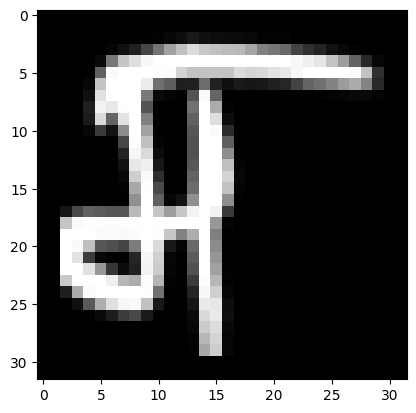

In [30]:
import numpy as np
import matplotlib.pyplot as plt
num=np.random.randint(0,5000)


pred_data = X_test[num]
print(f"Original shape of X_test[num]: {X_test[num].shape}")

# Reshape X_test[num] to have the correct shape for prediction
# If X_test[num] has 32 elements, it needs to be reshaped to (1, 32) if 32 is the feature size
# Otherwise, if the model expects 1024 features, ensure the reshaped array has (1, 1024)
reshaped_input = X_test[num].reshape(1, -1)  # Reshape to (1, feature_size)
print(f"Reshaped input shape: {reshaped_input.shape}")

# Perform prediction
prediction = model.predict(reshaped_input)

# Find the index of the highest probability class
pred = np.argmax(prediction)

# Print the corresponding label using your find function
print("The predicted letter is",find(datafory, pred))

print("The original letter is ",find(datafory,Y_test[num]))
getletter(num,X_test)
plt.close("all")


In [9]:
image_path = "1.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



resized_image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)

normalized_image = resized_image / 255.0

inverted_image = 1.0 - normalized_image


pre_num = model.predict(np.array([inverted_image.ravel()]))
ans = np.argmax(pre_num)
print("Predicted Number: ",find(datafory,ans))

plt.imshow(inverted_image)
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
image_path = "11.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


resized_image = cv2.resize(thresholded, (32, 32), interpolation=cv2.INTER_AREA)

normalized_image = resized_image / 255.0

inverted_image = 1.0 - normalized_image


pre_num = model.predict(np.array([inverted_image.ravel()]))
ans = np.argmax(pre_num)
print("Predicted Number: ",find(datafory,ans))

plt.imshow(inverted_image)
plt.show()
plt.imshow(thresholded)
plt.show()